### Make Plots for Impact of Discretization/Embedding-Sharing Parameters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data.metrics import get_metrics

In [2]:
def make_discretization_row_plot(
    df, model, metric, df_base=None, ax=None, figsize=(6, 3)
):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize, sharex=True, sharey=True)
    if df_base is not None: 
        df = pd.concat([df, df_base[df_base['loc_levels'] == 1]])
    df_agg = (
        df.groupby(["discretization_rows", "loc_levels", "model_cls"])[metric]
        .agg(["mean", "std"])
        .reset_index()
    )
    df_model = df_agg[df_agg["model_cls"] == model]

    # Generate colors from the viridis colormap
    cmap = plt.get_cmap("viridis", 4)
    colors = cmap(range(4))

    x = np.arange(100, 501, 100)
    df_base = df_model[df_model['loc_levels'] == 1]
    y = df_base["mean"].item()
    err = df_base["std"]
    color = colors[0]
    ax.plot(x, np.ones_like(x) * y, color=color, label=1)
    ax.fill_between(x, y - err, y + err, alpha=0.2, color=color)

    for loc_level in range(2, 5):
        df_line = df_model[df_model["loc_levels"] == loc_level]
        x = df_line["discretization_rows"]
        y = df_line["mean"]
        err = df_line["std"]
        color = colors[loc_level - 1]
        ax.plot(x, y, label=loc_level, color=color)
        ax.fill_between(x, y - err, y + err, alpha=0.2, color=color)
    ax.set_xlim(100, 500)
    return ax

In [4]:
df = pd.read_json("/home/cazzonelli/Documents/trajectory-forecasting/reports/discretization_grid.jsonl", lines=True, orient='records')
get_metrics(df, metrics=["top_1_accuracy", "top_5_accuracy", "macro_f1"])

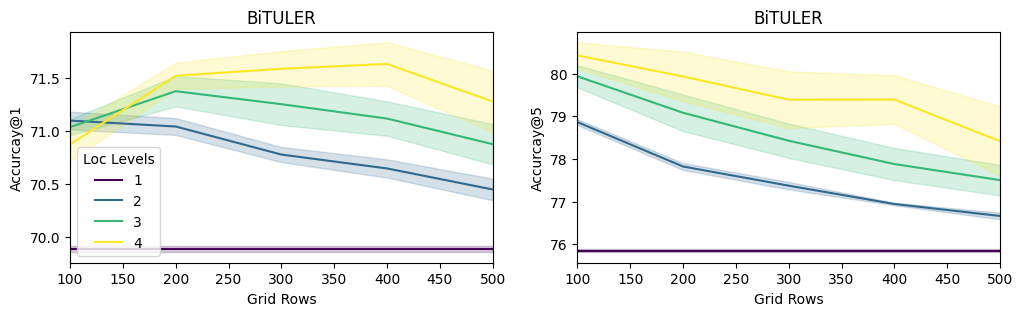

In [12]:
# Plot grouped discretization, weighted sum aggregation
df_plot = df[
    (df["embedding_type"] == "lookup_concat") & (df["aggregation_mode"] == "grow")
]
df_plot.loc[:, ["top_1_accuracy", 'top_5_accuracy']] *= 100
fig, axs = plt.subplots(ncols=2, figsize=(12, 3), sharex=True)
make_discretization_row_plot(
    df_plot, model="BiTULER", metric="top_1_accuracy", ax=axs[0]
)
make_discretization_row_plot(
    df_plot, model="BiTULER", metric="top_5_accuracy", ax=axs[1]
)
axs[0].set_ylabel("Accurcay@1")
axs[1].set_ylabel("Accurcay@5")
axs[0].set_xlabel("Grid Rows")
axs[1].set_xlabel("Grid Rows")
axs[0].set_title("BiTULER")
axs[1].set_title("BiTULER")
axs[0].legend(title="Loc Levels")
plt.savefig("../pub/figs/discretization_rows_BiTULER.png", dpi=300)

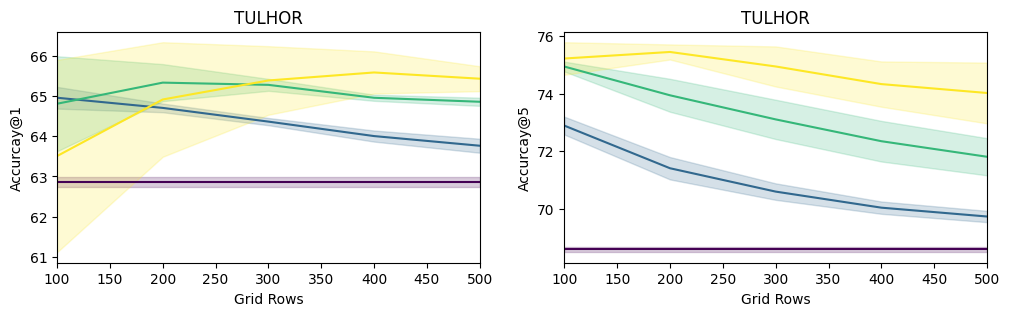

In [11]:
# Plot TULHOR Results
df_plot = df[
    (df["embedding_type"] == "lookup_concat") & (df["aggregation_mode"] == "grow")
]
df_plot.loc[:, ["top_1_accuracy", 'top_5_accuracy']] *= 100
fig, axs = plt.subplots(ncols=2, figsize=(12, 3), sharex=True)
make_discretization_row_plot(
    df_plot, model="TULHOR", metric="top_1_accuracy", ax=axs[0]
)
make_discretization_row_plot(
    df_plot, model="TULHOR", metric="top_5_accuracy", ax=axs[1]
)
axs[0].set_ylabel("Accurcay@1")
axs[1].set_ylabel("Accurcay@5")
axs[0].set_xlabel("Grid Rows")
axs[1].set_xlabel("Grid Rows")
axs[0].set_title("TULHOR")
axs[1].set_title("TULHOR")

plt.savefig("../pub/figs/discretization_rows_TULHOR.png", dpi=300)

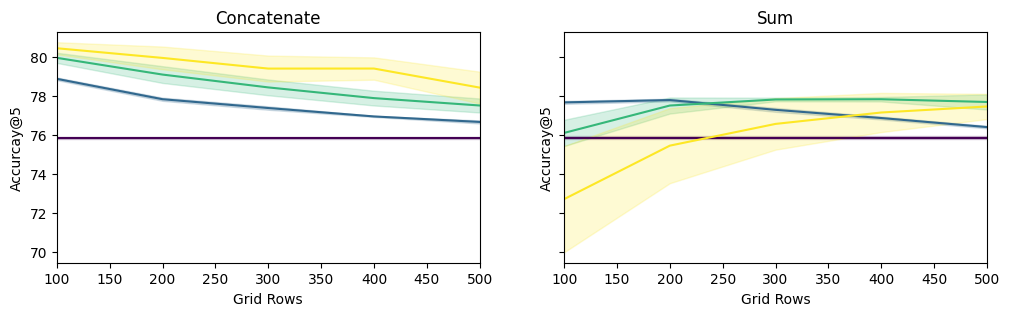

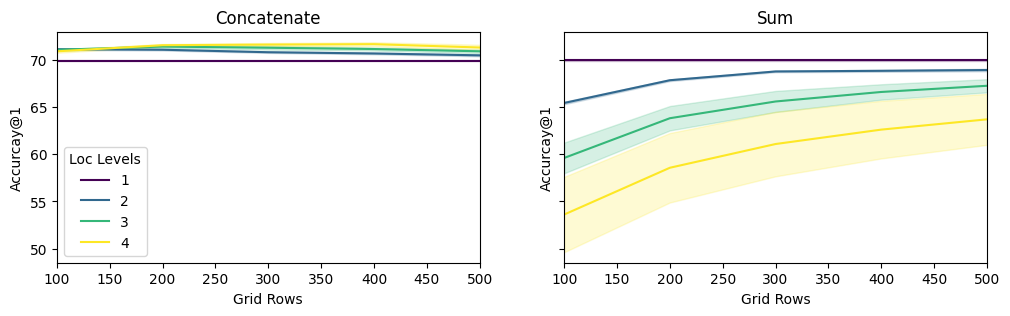

In [13]:
# Plot results for different embedding aggregation approaches
df_plot = df[(df["aggregation_mode"] == "grow")]
df_plot.loc[:, ["top_1_accuracy", "top_5_accuracy"]] *= 100

fig, axs = plt.subplots(ncols=2, figsize=(12, 3), sharex=True, sharey=True)
embedding_types = ["lookup_concat", "lookup_sum" ]
for ax, embedding_type in zip(axs, embedding_types):
    df_type = df_plot[df_plot["embedding_type"] == embedding_type]
    make_discretization_row_plot(
        df_type,
        model="BiTULER",
        metric="top_5_accuracy",
        ax=ax,
    )
    ax.set_ylabel("Accurcay@5")
    ax.set_xlabel("Grid Rows")

axs[0].set_title("Concatenate")
axs[1].set_title("Sum")

df_plot = df[(df["aggregation_mode"] == "grow")]
df_plot.loc[:, ["top_1_accuracy", "top_5_accuracy"]] *= 100

fig, axs = plt.subplots(ncols=2, figsize=(12, 3), sharex=True, sharey=True)
embedding_types = ["lookup_concat", "lookup_sum"]
for ax, embedding_type in zip(axs, embedding_types):
    df_type = df_plot[df_plot["embedding_type"] == embedding_type]
    make_discretization_row_plot(
        df_type,
        model="BiTULER",
        metric="top_1_accuracy",
        ax=ax,
    )
    ax.set_ylabel("Accurcay@1")
    ax.set_xlabel("Grid Rows")

axs[0].set_title("Concatenate")
axs[1].set_title("Sum")
axs[0].legend(title="Loc Levels")

plt.savefig("../pub/figs/discretization_rows_cat_v_sum.png", dpi=300)